In [1]:
import pandas as pd
import numpy as np

In [2]:
from collections import Counter

In [3]:
a_ce_dw = pd.read_csv('./magazine/final/a_ce_dw.csv', sep = '|', encoding = 'utf-8')
b_ce_dw = pd.read_csv('./magazine/final/b_ce_dw.csv', sep = '|', encoding = 'utf-8')
c_ce_dw = pd.read_csv('./magazine/final/c_ce_dw.csv', sep = '|', encoding = 'utf-8')
e_ce_dw = pd.read_csv('./magazine/final/e_ce_dw.csv', sep = '|', encoding = 'utf-8')
fb_ce_dw = pd.read_csv('./magazine/final/fb_ce_dw.csv', sep = '|', encoding = 'utf-8')
fn_ce_dw = pd.read_csv('./magazine/final/fn_ce_dw.csv', sep = '|', encoding = 'utf-8')
m_ce_dw = pd.read_csv('./magazine/final/m_ce_dw.csv', sep = '|', encoding = 'utf-8')
v_ce_dw = pd.read_csv('./magazine/final/v_ce_dw.csv', sep = '|', encoding = 'utf-8')
w_ce_dw = pd.read_csv('./magazine/final/w_ce_dw.csv', sep = '|', encoding = 'utf-8')

In [45]:
ce_dw = pd.concat([a_ce_dw, b_ce_dw, c_ce_dw, e_ce_dw, fb_ce_dw, fn_ce_dw, m_ce_dw, v_ce_dw, w_ce_dw])

In [46]:
ce_dw.reset_index(drop=True, inplace = True)

In [47]:
len(ce_dw)

764

In [48]:
ce_dw = ce_dw[['magazine', 'brand', 'category', 'title', 'link', 'date', 'contents',
       'title_brand', 'check', 'why', 'word_celine']]

In [49]:
for i in range(len(ce_dw)):
    if not '셀린' in ce_dw.loc[i, 'contents']:
        ce_dw.loc[i, 'check'] = 2

In [50]:
def drop_2(df):
    return df[df['check'] != 2]

In [51]:
ce_dw = drop_2(ce_dw)

# 전처리

### 기호 삭제

In [52]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('[', '').str.replace(']', '').str.replace('\\', '').str.replace('"', '').str.replace("'", "").str.replace('「', '').str.replace('」', '').str.replace('”', '').str.replace('‘', '').str.replace('“', '')

## 브랜드 및 디자이너 이름 대체

### 에디 슬리먼, 에디 슬리만 -> 'HEDI-SLIMANE'으로 변경
에디슬리먼, 에디슬리만, 에디 슬리먼, 에디 슬리만

In [53]:
for word in ce_dw['word_celine']:
    if 'Hedi' in word:
        print(word)
        print('-'*50)

언제든 잘 갖춰 입은 듯한 룩이 필요할 땐 테일러드 스타일의 베스트를 활용해보자. 정갈한 무채색의 베스트는 매일 입는 재킷 대신 신선한 느낌을 줄 수 있다. 특히 이번 시즌에는 셀린느, 막스마라, 마이클 코어스 등에서 선보인 것처럼 팬츠, 슈츠와 함께 입는 스리피스용 베스트 스타일도 염두에 둘 것. 전에 없던 성숙한 매력이 돋보일 것이다., 리본 블라우스와 핀 스트라이프 재킷, 베스트, 팬츠는 가격미정, 모두 셀린느 바이 에디 슬리먼(Celine by Hedi Slimane).
--------------------------------------------------
  정갈한 고딕체 로고 티셔츠는 가격미정, 셀린느 바이 에디 슬리먼(Celine by Hedi Slimane).
--------------------------------------------------
체인 프린트가 있는 주름 장식 원피스, 벨트와 사이하이 부츠는 모두 가격미정, 셀린느 바이 에디 슬리먼(Celine by Hedi Slimane).
--------------------------------------------------
6 홀스빗 장식의 레더 벨트는 가격미정, 셀린느 바이 에디 슬리먼(Celine by Hedi Slimane).
--------------------------------------------------
베이지색 케이프 코트, 터틀넥 니트,데님 팬츠, 벨트는 가격미정, 모두 셀린느 바이 에디 슬리먼(Celine by Hedi Slimane).
--------------------------------------------------
3 리자드 무늬의 와인색 백은 가격미정, 셀린느 바이 에디 슬리먼(Celine by Hedi Slimane).
--------------------------------------------------
블랙 레이스 톱과 하운즈투스 체크 패턴 팬츠는 각각 34만8천원, 39만8천원, 잉크(Ennk). 볼드한 크리스털 귀고리는 41만원, 

In [54]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('에디슬리먼', '에디-슬리먼').str.replace('에디 슬리먼', '에디-슬리먼').str.replace('에디슬리만', '에디-슬리먼').str.replace('에디 슬리만', '에디-슬리먼')

In [55]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('에디-슬리먼', 'HEDI-SLIMANE')

In [56]:
'Hedi Slimane'.upper()

'HEDI SLIMANE'

In [57]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('Hedi Slimane', 'HEDI-SLIMANE')

### 칼 라거펠드, 칼 라거펠트 -> KARL-LAGERFELD

In [58]:
for word in ce_dw['word_celine']:
    if '라거펠드' in word:
        print(word)
        print('-'*50)

지난 9월28일 셀린느 패션쇼 이후 HEDI-SLIMANE VS 피비필로의 팬들은 소셜 네트워크에서 총성없는 전쟁을 벌이고 있다. 파리 앵발리드(Invalides-루이 14세가 전쟁 부상병을 위해 창설한 요양소)’를 나이트클럽으로 변신시켜 진행한 이 패션쇼는 ’파리 젊은이의 야간 신문’이라는 타이틀로 선보였다.nn이 패션쇼에 대해 이번에 새롭게 영입된 프랑스 국적의 아티스틱 디렉터를 비호하는 그의 팬들과 전임자로 10년간 브랜드를 이끌며 미니멀리즘과 편안한 착장의 스포티 크룩으로 독립적인 전문직 여성들의 많은 사랑을 받았던 영국 출신 디자이너 피비 필로의 서포터들 사이에서는 찬반양론이 거세다.nnn특히 피비 필로의 팬들은 50세의 스타 디자이너로 디올옴므와 생로랑을 이끌었던 HEDI-SLIMANE이 지난 10년간 셀린느를 지배(?)하며 브랜드를 큰 성공으로 이끌었던 페미니스트 디자이너 피비 필로의 아성을 무너뜨렸다며 성토를 멈추지 않았다.nn브리티시 GQ’의 루 스토파드는 이번에 HEDI-SLIMANE이 선보인 ’다 갈아엎는 전술’은 품위가 떨어지지 않는 옷을 입고자 하는 여성들(셀린느 기존 고객)에게는’최악’이었다고 강하게 표현했다. 심지어는 슬리먼의 팬들도 이번 패션쇼에서 그가 필로의 유산을 완전히 지워 없애버렸다고 인정할 정도였다.nn페미니스트 디자이너 피비 필로 아성 무너뜨렸다?nnHEDI-SLIMANE은 마치 그의 영입 전 70년의 브랜드 역사가 존재하지 않았던 것처럼 그의 셀린느 01’패션쇼를 진행했다. 뿐만 아니라 그는 인스타그램에 피비 필로 재임 때 미국 유명 작가이자 사회 활동가 조안 디디온을 모델로 촬영한 한 광고 캠페인의 모든 이미지를 삭제하기도 했다. 슬리먼은 최근 피가로’와의 인터뷰에서 아티스틱 디렉터가 패션 메종에 새롭게 영입돼 들어올 때는 전임자를 따라하지 않는다고 밝혔다. 그는 1960년대 사용된 셀린느의 로고를 영감으로 액센트를 빼고 글자체를 바꾸면서 패션쇼 전부터 이슈몰이를 하기도 했다.nn이번 컬렉션에서 선보인 그의 첫 셀린느

In [59]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('칼 라거펠드', 'KARL-LAGERFELD').str.replace('칼 라거펠트', 'KARL-LAGERFELD')

In [60]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('칼 라거 펠트', 'KARL-LAGERFELD').str.replace('칼 라거필드', 'KARL-LAGERFELD')

In [61]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('칼라거펠트', 'KARL-LAGERFELD')

In [62]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('라거펠트', 'KARL-LAGERFELD').str.replace('라거펠드', 'KARL-LAGERFELD')

In [63]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('칼 러거펠트', 'KARL-LAGERFELD').str.replace('칼 라가펠드', 'KARL-LAGERFELD').str.replace('칼 라커펠드', 'KARL-LAGERFELD')

In [64]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('칼 라커펠트', 'KARL-LAGERFELD')

In [65]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('칼 라게펠트', 'KARL-LAGERFELD').str.replace('칼 라가펠트', 'KARL-LAGERFELD')

In [66]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('칼 카거펠트', 'KARL-LAGERFELD')

### 버지니 비아르 -> VIRGINIE VIARD

In [67]:
'Virginie Viard'.upper()

'VIRGINIE VIARD'

In [68]:
for word in ce_dw['word_celine']:
    if 'VIRGINIE-VIARD아' in word:
        print(word)
        print('-'*50)

In [69]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('버지니 비아르', 'VIRGINIE-VIARD').str.replace('버니지 비아르', 'VIRGINIE-VIARD')

In [70]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('버지니 비아드', 'VIRGINIE-VIARD')

In [71]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('버지니 비아니', 'VIRGINIE-VIARD')

In [72]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('버지니 비아', 'VIRGINIE-VIARD')

In [73]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('버지니비아르', 'VIRGINIE-VIARD')

In [74]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('비르지니 비아르', 'VIRGINIE-VIARD').str.replace('버지니아 비아르', 'VIRGINIE-VIARD').str.replace('비르자니 비아르', 'VIRGINIE-VIARD')

In [75]:
# ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('비아르', 'VIARD')

In [76]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('버지니 바이르', 'VIRGINIE-VIARD')

In [77]:
# ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('버지니', 'VIRGINIE-VIARD')

### 샤넬 -> CHANEL

In [78]:
for word in ce_dw['word_celine']:
    if '샤넬' in word:
        print(word)
        print('-'*50)

  요즘 들어 주식은 친구들과의 대화에서 빼놓을 수 없는 주제가 되었다. 코로나19를 겪으며 급격히 늘어난 불안감과 지금 시기가 새로운 기회가 될 수도 있음이 강조되면서 주식을 시작한 젊은 세대가 늘었기 때문이다. 에디터의 친구들도 하나 둘 시대의 흐름에 편승했는데, 며칠 전에도 이 같은 대화가 당연히 오갔다. 너 테슬라 주식 팔았어? 카카오를 사야 해? 네이버를 사야 해? 바이오주 너무 올라서 엄두가 안 난다. 난 비싸도 LVMH나 케어링을 조금씩 모으려고. 아직 주식 세계에 발을 들일 자신이 없어 늘 한 귀로 듣고 한 귀로 흘리는 에디터였다. 하지만 이날 이들이 나누는 주식 얘기 중 귀에 꽂히는 단어가 하나 있었으니, 뭐라고? LVMH? 케어링?’ 순간 번뜩였다. 나는 왜 그 생각을 하지 못했을까? 여기서 중요한 건 관심 없던 주식 세계에서도 알아듣는 단어가 있다는 것(안타깝게도 주식용어는 아니지만). LVMH!’ 기사를 썼어도 수백 번은 본 이름이고, 루이 비통, 디올, 셀린느, 펜디 등에 대해서는 하루에도 수십 번씩 보고 듣는 게 일이다. 패션 에디터로선 너무도 익숙한 그 이름. 왜 난 예쁜 가방만 보고 가방을 만드는 회사는 보지 못했을까. 순간 용기가 생겼다. 불현듯 경제 관련 라디오에서 스쳐 지나간 멘트가 떠올랐다. 여러분이 잘 알고 있고, 잘 소비하는 브랜드에 투자하세요. 한 리서치에서 우리에게 익숙하고 사용하고 싶은 브랜드와 투자하고 싶은 종목이 거의 비슷하다는 결과를 내비치며 투자 전문가가 한 말이다. 그래 이번 시즌엔 가방 말고 주식을 사자., 생각해보자. 나와 주변 친구들이 좋아하고 사고 싶은, 그리고 익숙한 브랜드가 뭐가 있지? 샤넬, 에르메스. 루이 비통, 디올, 구찌, 펜디, 셀린느, 지방시, 보테가 베네타 등 이름만 들어도 단번에 알아차릴 만한 명품들이다. 하지만 무턱대고 투자를 할 수는 없다. 역시 의심의 여지는 있다. 이 시기에 과연 명품 브랜드 주식을 사는 게 맞을까? 지금 사람들이 관심 있어 하는 종목은 주로 네이버, 카카오 

In [79]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('샤넬', 'CHANEL').str.replace('Chanel', 'CHANEL').str.replace('chanel', 'CHANEL')

### 크리스챤 디올, 디올, 디오르 -> DIOR

In [80]:
for word in ce_dw['word_celine']:
    if '디오르' in word:
        print(word)
        print('-'*50)

셀린느의 아트 디렉터로 돌아온 HEDI-SLIMANE이 패션계의 관심이 집중된 가운데 브랜드 리뉴얼의 첫번째 단계로 새로운 이미지를 드러냈다. 그의 디렉션 하에 진행된 첫번째 셀린느 핸드백 모델은 이미 레이디 가가가 들면서 스포트라이트를 받았다. 이번에는 브랜드의 로고 리뉴얼과 동시에 첫번째 광고 캠페인을 브랜드의 사이트를 통해 공개했다.nn또한 HEDI-SLIMANE의 인스타그램에는 LVMH그룹 브랜드중 하나인 셀린느의 블랙& 화이트 포트레이트 사진들을 다수 찾아볼 수 있다. 앤드로지너스한 룩의 어린 여성과 남성 모델들이 포인트 액세서리(베일, 리본 등)만 착용한 상태의 이미지다. HEDI-SLIMANE 특유의 독특한 미니멀리스트 스타일에 그동안 그가 성공적으로 끌어온 언더그라운드 록 터치를 가미한 룩으로 셀린느의 이미지를 제시했다.nn화이트 백그라운드에 특유의 볼드한 블랙로고가 돋보이는 그래픽한 블랙& 화이트의 사진 이미지는 그가 케링의 시그니처 브랜드 생 로랑을 부활시키며 선보였던 에스테틱(미)과 유사한 느낌을 연상케 한다.nn이러한 유사성은 웹상에서 이슈가 되기에 충분했다. HEDI-SLIMANE의 팬들은 이 마에스트로’의 리턴을 반기며 그가 만들어낸 새로운 이미지를 격찬하는 분위기지만 다수, 특히 셀린느의 기존 팬들은 이번 이미지가 과거 생로랑 캠페인과 너무 흡사하고 예전의 브랜드 이미지를 찾아볼 수 없다며 반기지 않는 분위기다.nn사실 이번에 새롭게 선보인 광고 캠페인은 그가 지난 2012년부터 2016년까지 생로랑의 매출을 폭발적으로 끌어올리던 때와 같은 레시피다. HEDI-SLIMANE이 일부러 셀린느에 같은 포뮬러를 적용했다는 평이다.nn그는 크리스티앙 디오르 무슈’를 디오르 옴므’로 변화시키거나 YSL’을 생로랑 파리’로 다시 명명했고 이번에는 셀린느의 로고에서 액센트 표시를 빼면서 다시 한번 변화를 시도했다. 이것은 그동안 리뉴얼을 준비하는 스타 디자이너에게 중요한 첫 스텝이라는 것이다.nn지금까지 HEDI-SLIMANE은 그동안 전임 아티

In [81]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('크리스찬 디올', 'DIOR').str.replace('크리스챤 디올', 'DIOR').str.replace('크리스찬디오르', 'DIOR')

In [82]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('디오르', 'DIOR').str.replace('디올', 'DIOR')

In [83]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('Dior', 'DIOR')

### Maria Grazia Chiuri -> MARIA-GRAZIA-CHIURI

In [399]:
'Maria Grazia Chiuri'.upper()

'MARIA GRAZIA CHIURI'

In [85]:
for word in ce_dw['word_celine']:
    if '치우리' in word:
        print(word)
        print('-'*50)

 2019 F/W 이것만 알면 끝!, 한층 길어진 부츠와 미디스커트, 호화로운 아우터와 함께 새로운 가을을 맞이하라.,  BYBAZAAR2019.10.16,  ,  ,  SUMMARY OF THE,  ,  ,  ,  SEASON,  ,  당신의 시그너처 룩을 신선하게’ 유지하면서도, 정리수납 전문가의 도움이 필요 없는 심플한 옷장을 갖는다는 것, 과연 가능한 일일까? 의식 있는 소비가 모두의 소망이 되어버린 시대, 이제 우린 무엇이 가장 강력한 임팩트를 줄 것인가에 대해 심사숙고해야 하며, 이를 토대로 똑똑한 소비 전략을 짜야 한다.,  올가을엔 신발 얘기부터 시작해야겠다. 한층 길어진 부츠의 활약으로 인해 지난 5년간 우리에게 사랑받아온 귀여운 앵클부티가 2순위로 밀려나고 있으니 말이다. 이번엔 정강이 부근까지 올라오는 CHANEL의 털 달린 아스펜(Aspen) 스키 부츠에 집중하거나, 슬림한 데님 팬츠에 포근한 시어링 안감의 셀린 부츠를 더해 코네티컷 전원풍의 시크한 룩을 연출하면 좋다. 롱부츠는 포토제닉한 스타일링을 완성해줄 뿐만 아니라, 우리에게 또 다른 자아를 형성해준다는 점에서 매우 주목할 만하다. 예를 들어 레이디라이크풍의 미디스커트와 로맨틱한 블라우스를 내던지고, 빨간 립스틱, 레오퍼드 프린트의 핍토(peep-toe) 사이하이 부츠를 활용해 자신만의 새로운 세계를 창조해낸 빅토리아 베컴, 마치 비욘세처럼 자신의 패션을 소통의 도구로 활용하는 미 하원의장 낸시 펠로시를 떠올려보라. 보수적인 스커트수트(아크리스)나, 그런지한 프린지 장식의 블랭킷 스커트(살바토레 페라가모)에 화려한 청키 힐 부츠를 더한다면 순식간에 영화 <콜걸(Klute)>의 분위기를 낼 수 있다. 반대로, 이번 시즌 롱부츠는 피부를 드러내는 의상에 일종의 품위랄까, 단정함을 부여하기도 한다. 그러니까 생 로랑의 퍼프볼(puffball) 쇼츠, 그리고 롱샴과 막스마라의 미니스커트(아슬아슬한 듯 품위 있는 길이의)는 충분히 소화할 수 있다는 얘기다.,  그런가 하면, 스커트가 돌아왔다

In [86]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('마리아 그라치아 치우리', 'MARIA-GRAZIA-CHIURI')

In [87]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('마리아 그라지아 치우리', 'MARIA-GRAZIA-CHIURI')

In [88]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('마리아 그라치아 키우리', 'MARIA-GRAZIA-CHIURI')

In [89]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('마리아 그라치아 치루이', 'MARIA-GRAZIA-CHIURI')

### 셀린느

In [91]:
for word in ce_dw['word_celine']:
    if '세린느' in word:
        print(word)
        print('-'*50)

In [92]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('셀린느', 'CELINE')

In [93]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('셀린', 'CELINE')

In [94]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('세린느', 'CELINE')

In [285]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('Celine', 'CELINE').str.replace('celine', 'CELINE').str.replace('Céline', 'CELINE')

### 입생로랑

In [96]:
for word in ce_dw['word_celine']:
    if 'Saint' in word:
        print(word)
        print('-'*50)

  (왼쪽부터) 시퀸으로 만든 꽃을 장식한 원피스는 베르사체(Versace). 멀티 컬러 원피스는 생 로랑 바이 안토니 바카렐로(Saint Laurent by Anthony Vaccarello). 빨간색 시퀸 장식 원피스는 CELINE 바이 HEDI-SLIMANE(CELINE by HEDI-SLIMANE).
--------------------------------------------------
 2018 F/W 파리 패션위크에서 생긴일,  패션 하우스의 아카이브에 자신의 메시지를 담아 새로운 코드를 창조해낸 크리에이티브 디렉터들. 그들로 인해 파리 패션위크는 어느 때보다 견고하고 신선하게 느껴졌다. 고급과 저급, 실용과 판타지를 오가는 하이브리드 현상은 이번 시즌에도 주요한 키워드로 떠올랐으며, 자연과 예술을 향한 경외심은 가장 강력한 영감으로 작용해 파리 패션계를 보다 풍요롭게 만들었다.,  BYBAZAAR2018.07.01,  CHANEL,  낙엽이 수북이 쌓인 가을 숲 풍경을 파노라마처럼 드리운 그랑 팔레. 에드워디언풍 롱 코트와 깃털 장식 드레스를 입은 모델들이 마치 숲속을 산책하듯 등장했다. 이건 일종의 인디언 서머’예요. 폭포를 배경으로 한 지난 시즌에 이어, KARL-LAGERFELD는 숲을 모티프로 자연에 대한 경외심을 드러냈다. 대지의 기운을 머금은 적갈색과 짙은 초록의 트위드 수트에는 호화로운 주얼리 스타일링으로 화려함을 더했고, 낙엽을 찍어낸 듯한 컬러풀한 프린트의 룩에는 골드 루렉스 소재 피스들을 매치해 이국적인 느낌을 강조했다. 가장 매력적으로 다가온 건 나일론 소재로 스포티한 변신을 꾀한 트위드 재킷과 피날레를 장식한 리틀 블랙 드레스와 핑크 장갑의 로맨틱한 조합!,   Louis Vuitton,  루브르 박물관은 니콜라 제스키에르의 미래지향적인 감성을 드러내는 데 있어 가장 탁월한 공간임이 분명하다. 영화 <스타워즈>의 우주선 내부를 옮겨 놓은 듯한 데커레이션과 거대한 분수를 중심으로 걸어 내려오는 모델들의 모습은 마치 미래 전사

In [97]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('이브 생 로랑', 'SAINT-LAURENT').str.replace('이브 생로랑', 'SAINT-LAURENT').str.replace('이브생로랑', 'SAINT-LAURENT')

In [98]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('입 생 로랑', 'SAINT-LAURENT').str.replace('입생로랑', 'SAINT-LAURENT')

In [99]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('생 로랑', 'SAINT-LAURENT').str.replace('생로랑', 'SAINT-LAURENT')

In [100]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('Saint Laurent', 'SAINT-LAURENT')

### 오뜨꾸뛰르

In [101]:
for word in ce_dw['word_celine']:
    if '꾸뛰르' in word:
        print(word)
        print('-'*50)

지난 1998년부터 10년동안 LVMH 소유의 CELINE를 이끌었던 피비 필로가 오는 3월 2018 가을/겨울 컬렉션을 끝으로 CELINE를 떠나고 그 후임으로 HEDI-SLIMANE이 임명되었다는 뉴스는 굉장히 흥미로웠다.  , 지난 2016년 4월 커링 그룹의 SAINT-LAURENT을 떠난지 2년만에 경쟁사인 LVMH 그룹 CELINE에 합류한 HEDI-SLIMANE은 CELINE의 아티스틱, 크리에이티브 & 이미지 디렉터로 2월부터 출근하며, 오는 10월 파리 패션위크에서 2019 봄/여름 데뷔 컬렉션을 선보일 예정이다., 소식통에 따르면, 그가 선보일 새로운 컬렉션은 일부 오뜨 꾸뛰르 아이템과 남여성용 기성복이 같은 런웨이 쇼에 올라가는 혼성쇼가 될 확률이 높다., HEDI-SLIMANE의 사명은 CELINE에 남성복 라인을 추가해야 하며 꾸뛰르 컬렉션을 확장과 함께 향수 라인을 런칭하는 것이다. 제픔 개발 외에도 광고 캠페인과 매장 인테리어 디자인에 이르기까지 모든 부분에서 라벨의 브랜드 이미지를 관리한다., HEDI-SLIMANE 스스로 언급한 것 처럼 그의 접근 방식은 전체론적이며 리더십 아래에서 패션 하우스의 크리에이티브 정산이 하나로 응집된다. , HEDI-SLIMANE이 이미 로레알이 운영하던 향수를 제외하고 SAINT-LAURENT에서 구현한 작업들이다. 향수 런칭은 HEDI-SLIMANE이 카링 그룹 SAINT-LAURENT과 헤어지는데 일정 부분 영향을 미쳤다. 전적으로 HEDI-SLIMANE 자신의 예술적 솜씨를 발휘할 첫 CELINE 향수는 12~18개월 안에 런칭될 것으로 예상된다., CELINE에 정통한 소식통은 당분간 기존의 스튜디오 직원들이 여성복과 남성복을 모두 관리하며 전용 남성복 디자인팀을 고용할 가능성은 없다고 전했다. HEDI-SLIMANE은 앞으로 미국 로스엔젤리스에서 계속 작업을 진행하며 캘리포니아로 CELINE 크리에이티브 팀을 이주시키는 않을 것으로 보인다.     , 따라서 HEDI-SLIMANE은 로스엔

In [102]:
# 오뜨 꾸
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('오뜨 꾸튀르', 'HAUTE-COUTURE').str.replace('오뜨 꾸띄르', 'HAUTE-COUTURE').str.replace('오뜨 꾸뛰르', 'HAUTE-COUTURE').str.replace('오뜨 꾸띠르', 'HAUTE-COUTURE')

In [103]:
# 오뜨꾸
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('오뜨꾸띄르', 'HAUTE-COUTURE').str.replace('오뜨꾸뛰르', 'HAUTE-COUTURE').str.replace('오뜨  꾸띄르', 'HAUTE-COUTURE')

In [104]:
# 오뜨 쿠
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('오뜨 쿠튀르', 'HAUTE-COUTURE')

In [105]:
# 오트 꾸
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('오트 꾸뛰르', 'HAUTE-COUTURE')

In [106]:
# 오트 쿠
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('오트 쿠튀르', 'HAUTE-COUTURE').str.replace('오트 쿠튀 르', 'HAUTE-COUTURE')

In [107]:
# 오트 쿠
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('오트 쿠튀르', 'HAUTE-COUTURE').str.replace('오트 쿠튀 르', 'HAUTE-COUTURE')

In [108]:
# 오트쿠
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('오트쿠튀르', 'HAUTE-COUTURE')

### 안토니 바칼레로 -> ANTHONY-VACCARELLO

In [109]:
for word in ce_dw['word_celine']:
    if '안토니오' in word:
        print(word)
        print('-'*50)

 연휴에 정주행하면 좋을 HEDI-SLIMANE의 #집콕영화,  CELINE의 크리에이티브 디렉터 HEDI-SLIMANE이 직접 큐레이팅한 영화 리스트,  BYBAZAAR2020.05.01,  모처럼 찾아온 황금연휴. 하지만 코로나 19의 여파로 밖에 나가기도, 지인들과 약속을 잡기도 녹록치 않은 상황이라면 CELINE의 크리에이티브 디렉터 HEDI-SLIMANE이 직접 큐레이팅한 영화 10편을 여유롭게 감상하는 건 어떨까. 그가 패션 애호가들을 위해 구성한 영화 리스트는 총 10가지로, 전쟁 영화부터 로맨스, 드라마까지 다양한 장르를 아우르고 있다.  ,  콘텐츠가 보이지 않으세요? Instagram에서 보기,   ,  공개된 열 가지 영화 리스트는 다음과 같다.,   ,  지욱의 묵시록 (Apocalypse Now, 1979),  크게 보기,  이전,  다음,  1 of 2,  네이버 영화,  감독 프란시스 포드 코폴라  ,  장르 드라마, 전쟁, 액션,  줄거리 미 특수부대 윌라드 대위는 커츠 대령을 암살하라는 특명을 받는다.,  그는 4명의 병사들과 함께 커츠 대령이 있는 캄보디아를 향해 기나긴 여정을 시작한다.,  종잡을 수 없는 극한 여정 속 끊임없는 견제와 공격으로 부대원을 잃기도 하지만 마침내 커츠 대령의 왕국에 도착한다.,  험난한 여정 끝에 커츠 대령과 만난 윌라드 대위는 상상을 초월하는 충격적인 사실을 듣고, 그와 부대원을 위협하는 엄청난 공포와 마주하는데…,   ,  샤레이드 (Charade, 1963),  크게 보기,  이전,  다음,  1 of 2,  네이버 영화,  감독 스탠리 도넌,  장르 코미디, 미스터리, 멜로/로맨스, 스릴러,  줄거리 레지나의 남편이 어느 날 살해된다. 장례식이 있던 날 그녀는 경찰로부터 남편이 현금 도난 사건에 연루되었으며 함께 범죄에 참가했던 사람들이 그 돈을 찾고 있다는 말을 듣는다. 그녀는 곧 세 명의 남자들로부터 계속 추적을 받는다. 그리고 조슈아라는 남자가 그녀를 도와주겠다고 한다. 돈의 행방은 묘

In [110]:
# 안토니
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('안토니바카렐로', 'ANTHONY-VACCARELLO').str.replace('안토니 바카렐로', 'ANTHONY-VACCARELLO').str.replace('안토니 버카렐로', 'ANTHONY-VACCARELLO')

### 피비 파일로

In [425]:
'Phoebe Philo'.upper()

'PHOEBE PHILO'

In [112]:
for word in ce_dw['word_celine']:
    if '파일로' in word:
        print(word)
        print('-'*50)

피터 두는 일상적인 워킹 우먼의 룩을 만드는 뉴욕 브랜드다. 간결하지만 독특한 커팅, 모던한 컬러 매치로 무장한 우아하고 세련된 커리어 우먼 룩을 제안한다. 이런 남다른 감도의 옷을 만드는 디자이너 피터 두는 FIT 졸업작품으로 LVMH 프라이즈를 수상하고, CELINE에서 피비 파일로와 일했다. 그의 디자인이 네타포르테의 신진 디자이너 육성 프로그램 더 뱅가드’에 선정된 건 그가 예술성과 상업성을 두루 갖췄다는 것을 의미한다. 그가 패션계의 신성으로 떠오르고 그의 옷이 여자들의 관심을 받는 이유를 묻자 그는 입지 못하는 황당한 옷을 만들지 않는 것’이라고 했다. 옷은 편안하고 실용적이어야 한다는 것. 피터 두의 치마엔 모두 주머니가 있고, 앉을 때 구김이 생기기 않도록 옷감에 인조 섬유를 더하는 식이다. 패션의 자극적인 점에 몰두해 다수가 놓치고 있는 것을 명확하게 캐치한 덕분이다. 피터 두의 이러한 장점은 주변의 평범한 친구 그리고 가족들에게서 영감을 받아 만들기 때문이라고 말한다. 그의 이야기를 듣고 보니 피터 두의 옷은 앞으로도 쭉 그럴 것 같다. 그는 최근에 전동 스쿠터를 구입해 쉬는 시간에 뉴욕을 돌아다닌다고 했다. 그리고 올해는 강아지 한 마리를 키우고 싶다고 했다. 지금 가장 핫한 초신성의 취미치고는 꽤 소소하고 일상적이다. 이런 그라면 앞으로도 쭉 그가 언급한 스타일리시하고 실용적인 옷’을 만들 수 있을 것 같다. 특별한 누군가의 옷이 아닌 평범한 나도 비범하게 멋스러울 수 있는 그런 옷 말이다.
--------------------------------------------------
2 가장 후회 없는 쇼핑 경험이 있다면? 피비 파일로의 CELINE 피스들. 그녀가 브랜드에 있을 당시에도 충분히 만족스러웠지만 떠나고 나서 쇼핑을 하려니 그만한 옷이 없는 것을 느꼈다. 이번 생에 가장 잘한 쇼핑으로 남을 것이다., 5 쇼핑에 실패할 확률이 적은 나만의 숍이 있나요? 나만의 숍이라 할 만큼 단골 숍은 없지만 분더샵이나 CELINE 매장, SPA

In [113]:
# 피비 
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('피비 파일로', 'PHOEBE-PHILO').str.replace('피비파일로', 'PHOEBE-PHILO')

In [114]:
# 피비 필로
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('피비 필로', 'PHOEBE-PHILO').str.replace('피비필로', 'PHOEBE-PHILO')

### upper

In [83]:
ce_dwr['word_celine'] = ce_dwr['word_celine'].str.upper()

C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### 오뜨쿠뛰르

In [273]:
for word in ce_dwr['word_celine']:
    if '꾸뛰르' in word:
        print(word)
        print('-'*50)

지난 1998년부터 10년동안 LVMH 소유의 CELINE를 이끌었던 PHOEBE-PHILO가 오는 3월 2018 가을/겨울 컬렉션을 끝으로 CELINE를 떠나고 그 후임으로 HEDI-SLIMANE이 임명되었다는 뉴스는 굉장히 흥미로웠다.  , 지난 2016년 4월 커링 그룹의 SAINT-LAURENT을 떠난지 2년만에 경쟁사인 LVMH 그룹 CELINE에 합류한 HEDI-SLIMANE은 CELINE의 아티스틱, 크리에이티브 & 이미지 디렉터로 2월부터 출근하며, 오는 10월 파리 패션위크에서 2019 봄/여름 데뷔 컬렉션을 선보일 예정이다., 소식통에 따르면, 그가 선보일 새로운 컬렉션은 일부 HAUTE-COUTURE 아이템과 남여성용 기성복이 같은 런웨이 쇼에 올라가는 혼성쇼가 될 확률이 높다., HEDI-SLIMANE의 사명은 CELINE에 남성복 라인을 추가해야 하며 꾸뛰르 컬렉션을 확장과 함께 향수 라인을 런칭하는 것이다. 제픔 개발 외에도 광고 캠페인과 매장 인테리어 디자인에 이르기까지 모든 부분에서 라벨의 브랜드 이미지를 관리한다., HEDI-SLIMANE 스스로 언급한 것 처럼 그의 접근 방식은 전체론적이며 리더십 아래에서 패션 하우스의 크리에이티브 정산이 하나로 응집된다. , HEDI-SLIMANE이 이미 로레알이 운영하던 향수를 제외하고 SAINT-LAURENT에서 구현한 작업들이다. 향수 런칭은 HEDI-SLIMANE이 카링 그룹 SAINT-LAURENT과 헤어지는데 일정 부분 영향을 미쳤다. 전적으로 HEDI-SLIMANE 자신의 예술적 솜씨를 발휘할 첫 CELINE 향수는 12~18개월 안에 런칭될 것으로 예상된다., CELINE에 정통한 소식통은 당분간 기존의 스튜디오 직원들이 여성복과 남성복을 모두 관리하며 전용 남성복 디자인팀을 고용할 가능성은 없다고 전했다. HEDI-SLIMANE은 앞으로 미국 로스엔젤리스에서 계속 작업을 진행하며 캘리포니아로 CELINE 크리에이티브 팀을 이주시키는 않을 것으로 보인다.     , 따라서 HED

In [274]:
# 오뜨 꾸
ce_dwr['word_celine'] = ce_dwr['word_celine'].str.replace('오뜨 꾸튀르', 'HAUTE-COUTURE').str.replace('오뜨 꾸띄르', 'HAUTE-COUTURE').str.replace('오뜨 꾸뛰르', 'HAUTE-COUTURE').str.replace('오뜨 꾸띠르', 'HAUTE-COUTURE')

C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [275]:
# 오뜨꾸
ce_dwr['word_celine'] = ce_dwr['word_celine'].str.replace('오뜨꾸띄르', 'HAUTE-COUTURE').str.replace('오뜨꾸뛰르', 'HAUTE-COUTURE').str.replace('오뜨  꾸띄르', 'HAUTE-COUTURE')

C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [276]:
# 오뜨 쿠
ce_dwr['word_celine'] = ce_dwr['word_celine'].str.replace('오뜨 쿠튀르', 'HAUTE-COUTURE')

C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [277]:
# 오트 꾸
ce_dwr['word_celine'] = ce_dwr['word_celine'].str.replace('오트 꾸뛰르', 'HAUTE-COUTURE')

C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [278]:
# 오트 쿠
ce_dwr['word_celine'] = ce_dwr['word_celine'].str.replace('오트 쿠튀르', 'HAUTE-COUTURE').str.replace('오트 쿠튀 르', 'HAUTE-COUTURE')

C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [279]:
# 오트 쿠
ce_dwr['word_celine'] = ce_dwr['word_celine'].str.replace('오트 쿠튀르', 'HAUTE-COUTURE').str.replace('오트 쿠튀 르', 'HAUTE-COUTURE')

C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### 꾸뛰르

In [280]:
# 꾸
ce_dwr['word_celine'] = ce_dwr['word_celine'].str.replace('꾸뛰르', 'COUTURE').str.replace('꾸띄르', 'COUTURE')

C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [281]:
# 쿠
ce_dwr['word_celine'] = ce_dwr['word_celine'].str.replace('쿠튀르', 'COUTURE')

C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### ce_dw 파일 저장 -> ce_dwr (drop, word-extracting, replace-word)

In [286]:
ce_dw.to_csv('./magazine/final/ce_dwr.csv', sep='|', encoding = 'utf-8', index = False)

In [5]:
ce_dwr = pd.read_csv('./magazine/final/ce_dwr.csv', sep='|', encoding = 'utf-8')

In [288]:
ce_dw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 764 entries, 0 to 763
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   magazine       764 non-null    object
 1   brand          764 non-null    object
 2   category       764 non-null    object
 3   title          764 non-null    object
 4   link           764 non-null    object
 5   date           764 non-null    object
 6   contents       764 non-null    object
 7   title_brand    764 non-null    int64 
 8   check          764 non-null    int64 
 9   why            120 non-null    object
 10  word_celine    764 non-null    object
 11  sentences_tag  764 non-null    object
 12  ADFN           764 non-null    object
 13  Noun_Foreign   764 non-null    object
dtypes: int64(2), object(12)
memory usage: 109.5+ KB


In [119]:
ce_dwr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   magazine     764 non-null    object
 1   brand        764 non-null    object
 2   category     764 non-null    object
 3   title        764 non-null    object
 4   link         764 non-null    object
 5   date         764 non-null    object
 6   contents     764 non-null    object
 7   title_brand  764 non-null    int64 
 8   check        764 non-null    int64 
 9   why          120 non-null    object
 10  word_celine  764 non-null    object
dtypes: int64(2), object(9)
memory usage: 65.8+ KB


## list 생성 후 append

In [282]:
len(ce_dwr)

764

In [283]:
magazine_list = []
article_list = []
for word in ce_dwr['word_celine']:
    article_list.append(word)

In [284]:
len(article_list)

764

In [285]:
article_list[120]

' LONG & LEAN SKIRT N군더더기 없이 심플한 실루엣의 롱스커트 트렌드가 돌아왔다. CELINE, 프라다, 질샌더, 끌로에 등 런웨이에서 이미 예고된 롱앤린 트렌드는 스트리트에서도 점차 인기를 더해가고 있다. 우아하고 로맨틱한 한겨울 룩을 연출하고 싶다면 톤온톤의 니트 상의와 롱코트를, 경쾌한 겨울 룩을 원한다면 패턴이 가미된 스웨터와 짧은 패딩을 더해볼 것.,  FLARE PANTS N플레어 팬츠는 한층 더 드라마틱해졌다. 허리부터 허벅지까지는 쫙 붙었다가 무릎 아래부터는 더 과감하게 통이 넓어졌기 때문! CELINE 런웨이에서 선보인 것처럼 1970년대 무드로 보 블라우스와 코트를 더해도 좋고, 지방시나 구찌처럼 각 잡힌 재킷과 함께 카리스마 있게 연출해도 좋다. 키가 작은 편이라 해도 넓은 밑단 아래로 굽 높은 슈즈를 숨길 수 있으니 이 얼마나 고마운 플레어 팬츠인가.'

### 기호 삭제

In [286]:
# import re

# for article in article_list:
#     article_list2 = re.sub('[^\w\s]', '', article)

# # article_list[100].replace(' \', '')

## Twitter

In [287]:
from konlpy.tag import Twitter

In [288]:
twitter = Twitter()


C:\Users\wnsgo\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


### 각 문장별로 형태소 구분하기

In [289]:
sentences_tag = []

n=0
for sentence in article_list:
    morph = twitter.pos(sentence)
    sentences_tag.append(morph)
    n+=1
    print(n, end=' ')
    

print(len(sentences_tag))


1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

In [290]:
sentences_tag[90]

[('변덕', 'Noun'),
 ('스러운', 'Josa'),
 ('날씨', 'Noun'),
 ('에', 'Josa'),
 ('탁월한', 'Adjective'),
 ('서머', 'Noun'),
 ('샌들', 'Noun'),
 ('연출', 'Noun'),
 ('법', 'Noun'),
 (',', 'Punctuation'),
 ('아리아나', 'Noun'),
 ('그란', 'Modifier'),
 ('데', 'Noun'),
 ('도', 'Josa'),
 ('신는', 'Verb'),
 ('크', 'Verb'),
 ('록스', 'Noun'),
 ('부터', 'Josa'),
 ('지수', 'Noun'),
 ('의', 'Josa'),
 ('스포', 'Noun'),
 ('티', 'Noun'),
 ('샌들', 'Noun'),
 ('까지', 'Josa'),
 ('!,', 'Punctuation'),
 ('BYBAZAAR', 'Alpha'),
 ('2020.08', 'Number'),
 ('.', 'Punctuation'),
 ('12', 'Number'),
 (',', 'Punctuation'),
 (',', 'Punctuation'),
 ('무더위', 'Noun'),
 ('와', 'Josa'),
 ('긴', 'Verb'),
 ('장마', 'Noun'),
 ('가', 'Josa'),
 ('이어지는', 'Verb'),
 ('올여름', 'Noun'),
 (',', 'Punctuation'),
 ('신고', 'Noun'),
 ('벗기', 'Verb'),
 ('쉽고', 'Verb'),
 ('바캉스', 'Noun'),
 ('룩', 'Noun'),
 ('에도', 'Josa'),
 ('잘', 'Verb'),
 ('어울리는', 'Verb'),
 ('여름', 'Noun'),
 ('샌들', 'Noun'),
 ('과', 'Josa'),
 ('비', 'Noun'),
 ('가', 'Josa'),
 ('와도', 'Josa'),
 ('끄', 'Verb'),
 ('떡', 'Noun'),
 ('없는', '

In [291]:
ce_dwr['sentences_tag'] = sentences_tag 

C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [292]:
ce_dwr.loc[400, 'sentences_tag']

[('2020', 'Number'),
 ('F', 'Alpha'),
 ('/', 'Punctuation'),
 ('W', 'Alpha'),
 ('CELINE', 'Alpha'),
 ('컬렉션', 'Noun'),
 ('은', 'Josa'),
 ('70년', 'Number'),
 ('대', 'Foreign'),
 ('부르조아', 'Noun'),
 ('풍', 'Noun'),
 ('의', 'Josa'),
 ('우아하지만', 'Adjective'),
 ('시크', 'Noun'),
 ('한', 'Josa'),
 ('파리', 'Noun'),
 ('지엔', 'Noun'),
 ('룩', 'Noun'),
 ('으로', 'Josa'),
 ('일반', 'Noun'),
 ('여성', 'Noun'),
 ('들', 'Suffix'),
 ('이', 'Josa'),
 ('출근', 'Noun'),
 ('하면서', 'Verb'),
 ('입', 'Noun'),
 ('을', 'Josa'),
 ('수', 'Noun'),
 ('있는', 'Adjective'),
 ('대중', 'Noun'),
 ('친', 'Noun'),
 ('화', 'Suffix'),
 ('적', 'Noun'),
 ('인', 'Josa'),
 ('피스', 'Noun'),
 ('들', 'Suffix'),
 ('이', 'Josa'),
 ('중심', 'Noun'),
 ('을', 'Josa'),
 ('이뤘다', 'Verb'),
 ('.,', 'Punctuation'),
 ('지난', 'Noun'),
 ('2월', 'Number'),
 ('28일', 'Number'),
 ('(', 'Punctuation'),
 ('현지', 'Noun'),
 ('시간', 'Noun'),
 (')', 'Punctuation'),
 ('열린', 'Verb'),
 ('CELINE', 'Alpha'),
 ('컬렉션', 'Noun'),
 ('은', 'Josa'),
 ('지난', 'Noun'),
 ('1월', 'Number'),
 ('에', 'Foreign'),
 ('남성

In [293]:
ce_dw.to_csv('./magazine/final/ce_tag_Twitter.csv', sep = '|', encoding = 'utf-8', index = False)

In [294]:
twitter.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

# 전처리끝

# 분석시작

### stop_words 추가

In [295]:
# from nltk.corpus import stopwords 
# from nltk.tokenize import word_tokenize 

In [296]:
sw_df = pd.read_csv('stopwords.csv', header=None)

In [297]:
sw_df.columns = ['stopword']

In [298]:
stop_words = []
for sw in sw_df['stopword']:
    stop_words.append(sw)

In [299]:
print(len(stop_words))
print(type(stop_words))

675
<class 'list'>


In [300]:
stop_words[-10:]

['둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '령', '영']

In [301]:
add_0 = ['있', '위하', '가격미정', '미정', '가격', '지나', '선보이', '이번', '특히', '통하', '역시', '때문', '않', '알리', '주목', '대하', '한편', '사실', '당시', '그것', '지금', '사람' ]
for w in add_0:
    stop_words.append(w)

In [302]:
add_1 = ['위하', '선보이', '가격', '가격 미정', '미정', '지금', 'BY', 'N', '있', '없', '지나', '만들', '말하', '입', '보', '되','선보이', '같', '대하', '등장', 'n', 'nn']
for w in add_1:
    stop_words.append(w)

In [303]:
add_2 = ["가격", "가격미정", "같", "그것", "당시", "대하", "더", "되", "등장", "때문", "만들", "말하", "미정", "보",
"사람", "사실", "선보이", "않", "알리", "없", "역시", "위하", "이번", "입", "있", "주목", "지금", "지나", "통하", "특히",
"한편", "BY", "N", "NN", "수", "은", "위", "말", "대", "전", "듯", "중", "최근", "보여주", "후"]
for w in add_2:
    stop_words.append(w)

In [304]:
add_top200 = ['가장', '지난', '같은', '복', '버버리', '위해', 'LVMH', '내', '두', '통해', '대한', '건', '속', '모든', '패션계', 
              '스', '구찌', '드', '그룹', '발렌시아', '눈', '세', '컬렉션', '패션', 'LAURENT', 'SAINT', 'DIOR', '지방시', '바이',
              '안', '티', '재', '데', '가지', '있는', 'CHANEL', 'S', '시즌', '모습', '사진', '매치', 'SLIMANE', 'PHILO',
             '모습', '연출', '시작']
for w in add_top200:
    stop_words.append(w)

In [305]:
stop_words[-10:]

['S', '시즌', '모습', '사진', '매치', 'SLIMANE', 'PHILO', '모습', '연출', '시작']

In [306]:
len(stop_words)

810

### 1. 'Adjective': '형용사', 'Determiner': '관형사', 'Foreign': '외국어, 한자 및 기타기호', 'Alpha': '알파벳', 'Noun': '명사' 품사만 선별해 리스트에 담기

In [307]:
ADFN_word_list= []
for sentence1 in sentences_tag:
    for word, tag in sentence1:
        if tag in ['Adjective', 'Determiner','Foreign','Noun', 'Alpha']:
            if word not in stop_words:
                ADFN_word_list.append(word)

In [308]:
len(ADFN_word_list)

67582

In [309]:
ADFN_list= []
for sentence1 in sentences_tag:
    words = []
    for word, tag in sentence1:
        if tag in ['Adjective', 'Determiner','Foreign','Noun', 'Alpha']:
            if word not in stop_words:
                words.append(word)
    ADFN_list.append(words)

In [310]:
len(ADFN_list)

764

In [311]:
ce_dw['ADFN'] = ADFN_list

In [312]:
ADFN_df = pd.DataFrame({
    'article':article_list,
    'noun':ADFN_list
})

In [313]:
ADFN_word_list[-10:]

['그녀', '새로운', '중년', '파워', '스타일', '리스트', '로치', 'LAW', 'ROACH', '공이']

### 선별된 품사별 빈도수 계산 & 상위 빈도 10위까지 출력

In [314]:
count = Counter(ADFN_word_list)
print(count.most_common(100))

[('CELINE', 1754), ('HEDI', 511), ('브랜드', 508), ('룩', 355), ('디자이너', 345), ('백', 304), ('컬러', 288), ('스타일', 284), ('여성', 283), ('드레스', 271), ('남성', 269), ('쇼', 267), ('디자인', 245), ('PHOEBE', 228), ('장식', 225), ('팬츠', 225), ('디렉터', 215), ('재킷', 214), ('코트', 207), ('파리', 204), ('새로운', 201), ('옷', 195), ('아이템', 191), ('그녀', 184), ('모델', 171), ('소재', 156), ('첫', 154), ('크리에이티브', 143), ('셔츠', 139), ('스타', 136), ('로고', 135), ('블랙', 134), ('가죽', 134), ('스커트', 129), ('트렌드', 129), ('런웨이', 127), ('영국', 127), ('실루엣', 124), ('시대', 121), ('봄', 121), ('부츠', 115), ('클래식', 112), ('다양한', 112), ('매력', 112), ('여름', 109), ('럭셔리', 107), ('화이트', 107), ('제품', 102), ('매장', 100), ('데님', 99), ('생각', 99), ('라인', 99), ('완성', 98), ('영감', 97), ('링', 95), ('가방', 95), ('무드', 95), ('프린트', 94), ('사이즈', 92), ('변화', 91), ('세계', 90), ('수트', 90), ('에디', 89), ('슈즈', 88), ('패턴', 87), ('없는', 87), ('일링', 86), ('광고', 86), ('하우스', 85), ('액세서리', 85), ('데뷔', 84), ('패션위크', 82), ('영화', 81), ('패션쇼', 81), ('선택', 80), ('성복', 79), ('많은'

In [315]:
# 한 글자인 단어는 제외

# for i, v in enumerate(ADFN_word_list):
#     if len(v)<2:
#         ADFN_list.pop(i)

In [316]:
ADFN_rank = count.most_common(200)
# for v in word_list:
#     print(v)
ADFN_rank

[('CELINE', 1754),
 ('HEDI', 511),
 ('브랜드', 508),
 ('룩', 355),
 ('디자이너', 345),
 ('백', 304),
 ('컬러', 288),
 ('스타일', 284),
 ('여성', 283),
 ('드레스', 271),
 ('남성', 269),
 ('쇼', 267),
 ('디자인', 245),
 ('PHOEBE', 228),
 ('장식', 225),
 ('팬츠', 225),
 ('디렉터', 215),
 ('재킷', 214),
 ('코트', 207),
 ('파리', 204),
 ('새로운', 201),
 ('옷', 195),
 ('아이템', 191),
 ('그녀', 184),
 ('모델', 171),
 ('소재', 156),
 ('첫', 154),
 ('크리에이티브', 143),
 ('셔츠', 139),
 ('스타', 136),
 ('로고', 135),
 ('블랙', 134),
 ('가죽', 134),
 ('스커트', 129),
 ('트렌드', 129),
 ('런웨이', 127),
 ('영국', 127),
 ('실루엣', 124),
 ('시대', 121),
 ('봄', 121),
 ('부츠', 115),
 ('클래식', 112),
 ('다양한', 112),
 ('매력', 112),
 ('여름', 109),
 ('럭셔리', 107),
 ('화이트', 107),
 ('제품', 102),
 ('매장', 100),
 ('데님', 99),
 ('생각', 99),
 ('라인', 99),
 ('완성', 98),
 ('영감', 97),
 ('링', 95),
 ('가방', 95),
 ('무드', 95),
 ('프린트', 94),
 ('사이즈', 92),
 ('변화', 91),
 ('세계', 90),
 ('수트', 90),
 ('에디', 89),
 ('슈즈', 88),
 ('패턴', 87),
 ('없는', 87),
 ('일링', 86),
 ('광고', 86),
 ('하우스', 85),
 ('액세서리', 85),
 ('데뷔', 84)

### 2. 'Foreign': '외국어, 한자 및 기타기호', 'Noun': '명사', 'Alpha': '알파벳' 품사만 선별해 리스트에 담기

In [323]:
noun= []
for sentence1 in sentences_tag:
    for word, tag in sentence1:
        if word not in stop_words:
            if tag in ['Foreign', 'Noun', 'Alpha']:
                noun.append(word)

In [324]:
# for i, v in enumerate(noun):
#     if len(v)<2:
#         noun.pop(i)

In [325]:
counts = Counter(noun)

In [326]:
noun_rank = counts.most_common(200)
noun_rank

[('CELINE', 1753),
 ('컬렉션', 538),
 ('수', 532),
 ('SLIMANE', 516),
 ('HEDI', 510),
 ('브랜드', 508),
 ('패션', 435),
 ('룩', 355),
 ('시즌', 352),
 ('디자이너', 345),
 ('백', 304),
 ('컬러', 288),
 ('스타일', 284),
 ('여성', 283),
 ('드레스', 271),
 ('남성', 269),
 ('쇼', 267),
 ('디자인', 245),
 ('말', 237),
 ('PHILO', 232),
 ('가장', 227),
 ('장식', 225),
 ('팬츠', 225),
 ('PHOEBE', 224),
 ('지난', 222),
 ('더', 220),
 ('디렉터', 215),
 ('재킷', 214),
 ('코트', 207),
 ('은', 206),
 ('파리', 204),
 ('옷', 195),
 ('위', 194),
 ('LAURENT', 194),
 ('SAINT', 192),
 ('아이템', 191),
 ('대', 187),
 ('그녀', 184),
 ('사진', 177),
 ('매치', 173),
 ('복', 172),
 ('모델', 171),
 ('S', 164),
 ('소재', 156),
 ('첫', 154),
 ('DIOR', 147),
 ('크리에이티브', 143),
 ('듯', 141),
 ('셔츠', 139),
 ('전', 139),
 ('시작', 138),
 ('스타', 136),
 ('로고', 135),
 ('블랙', 134),
 ('가죽', 134),
 ('버버리', 131),
 ('스커트', 129),
 ('트렌드', 129),
 ('위해', 129),
 ('LVMH', 128),
 ('런웨이', 127),
 ('영국', 127),
 ('CHANEL', 124),
 ('실루엣', 124),
 ('시대', 121),
 ('봄', 121),
 ('통해', 116),
 ('부츠', 115),
 ('대한', 114

### 3. 명사만 선별해 아티클 별로 리스트에 담기

In [327]:
noun_article= []
for sentence1 in sentences_tag:
    art_noun = []
    for word, tag in sentence1:
        if word not in stop_words:
            if tag in ['Noun', 'Foreign', 'Alpha']:
                art_noun.append(word)
    noun_article.append(art_noun)

print(len(noun_article))

764


In [328]:
len(article_list)

764

In [329]:
noun_df = pd.DataFrame({
    'article':article_list,
    'noun':noun_article
})

In [330]:
noun_df.head()

,article,noun
0,"골드 잠금 장식으로 포인트를 준 케이프 체크 코트는 1백9만원, 산드로(Sandro...","[골드, 장식, 포인트, 준, 케이프, 체크, 코트, 백, 산드로, Sandro, ..."
1,"빈티지한 주름과 워싱이 특징인 데님 팬츠는 가격미정, CELINE(CELINE).","[빈티, 주름, 워싱, 특징, 데님, 팬츠, CELINE, CELINE]"
2,1970년대 에스닉한 분위기가 물씬 풍기는 CELINE의 방패 모양 숄더백.,"[대, 에스, 닉, 분위기, 물씬, CELINE, 방패, 모양, 숄더백]"
3,"재킷, 셔츠, 슈즈는 CELINE(CELINE), 블랙 스커트는 렉토, 이어링은 스...","[재킷, 셔츠, 슈즈, CELINE, CELINE, 블랙, 스커트, 렉토, 이어링,..."
4,"재킷, 셔츠, 네크리스는 모두 CELINE(CELINE), 팬츠는 다잉브리드, 슈즈...","[재킷, 셔츠, 크리스, CELINE, CELINE, 팬츠, 다잉브, 리드, 슈즈,..."


In [331]:
ce_dw['Noun_Foreign'] = noun_article

### 

In [45]:
len(ce_dwr)

764

In [50]:
ce_dwr = ce_dwr[['magazine', 'brand', 'category', 'title', 'link', 'date', 'contents',
       'title_brand', 'check', 'why', 'word_celine', 'sentences_tag', 'ADFN']]

In [52]:
ce_dwr.to_csv('magazine/final/magazine_ce_twitter.csv', sep = '|', index = False, encoding = 'utf-8')

### 명사빈도 카운트

## 워드클라우드 만들기

In [53]:
import matplotlib.pyplot as plt

### 패키지 및 폰트 설치

In [54]:
import matplotlib.font_manager as fm

# # 이용 가능한 폰트 중 '고딕'만 선별
# for font in fm.fontManager.ttflist:
#     if 'Gothic' in font.name:
#         print(font.name, font.fname)

In [55]:
font_path = 'C:\WINDOWS\Fonts\malgun.ttf'

### wordcloud 그리기

In [56]:
from wordcloud import WordCloud

In [57]:
wc = WordCloud(font_path=font_path, background_color="white", width=600, height=400)

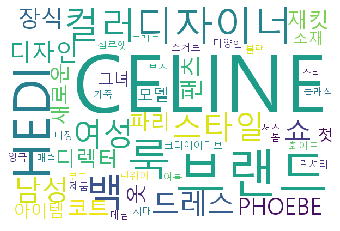

In [317]:
wc.generate_from_frequencies(dict(ADFN_rank[:50]))

plt.imshow(wc) 
plt.axis('off') 
plt.show()


wc.to_file('ce_ADFN_dropword50.png')

In [318]:
# wc.generate_from_frequencies(dict(noun_rank))

# plt.imshow(wc) 
# plt.axis('off') 
# plt.show()

# wc.to_file('twitter_noun_celine.png')

### rank 보기

In [319]:
ce_ADFN_rank_df = pd.DataFrame(ADFN_rank)

In [320]:
ce_ADFN_rank_df.columns = ['word', 'count']

In [321]:
ce_ADFN_rank_df.loc[:50]

,word,count
0,CELINE,1754
1,HEDI,511
2,브랜드,508
3,룩,355
4,디자이너,345
5,백,304
6,컬러,288
7,스타일,284
8,여성,283
9,드레스,271


In [322]:
ce_ADFN_rank_df['rank'] = range(1, 201)

In [323]:
ce_ADFN_rank_df = ce_ADFN_rank_df[['rank', 'word', 'count']]

In [325]:
ce_ADFN_rank_df.to_csv('./magazine/final/ce_ADFN_rank_dropword.csv', sep='|', encoding = 'utf-8', index = False)

In [ ]:
['LAURENT', 'SAINT', 'DIOR', '지방시', '바이', '안', '티', '재', '데', '가지']

In [324]:
ce_dwr.to_csv('./magazine/final/magazine_ce.csv', sep='|', encoding = 'utf-8', index = False)

In [121]:
for i in range(len(ADFN_df)):
    if '세' in ADFN_df.loc[i, 'noun']:
        print(i)

82
91
102
104
106
107
108
110
111
112
118
242
244
246
250
288
289
301
305
312
326
327
333
339
355
362
363
367
370
371
374
377
380
389
400
404
410
412
413
484
500
522
523
530
615
665
694
707
753
760
763


In [124]:
ADFN_df.loc[694, 'noun']

['시즌',
 '런웨이',
 '시선',
 '강탈',
 '세',
 '명의',
 '모델',
 '두',
 '엄마',
 '활동',
 '중국',
 '모델',
 '리나',
 'LINA',
 'ZHANG',
 '프로',
 '스쿨',
 '러',
 '세미',
 '익스',
 '클루',
 '시브',
 '시작',
 '메종',
 '마르지',
 '엘라',
 '발렌시아',
 '도시',
 '런웨이',
 '꾸준히',
 '성숙해진',
 '분위기',
 '시즌',
 '단연',
 '코',
 '독보',
 '오라',
 '발산',
 '밴드',
 '혁오',
 '스타일',
 '리스트',
 '김',
 '영은',
 '발렌시아',
 '만',
 '파리',
 '무대',
 '복귀',
 '모델',
 '강소영',
 'CELINE',
 '런웨이',
 '서프라이즈',
 '선사']

In [122]:
ce_dw.loc[371, 'link']

'https://www.fashionbiz.co.kr/article/view.asp?cate=1&sub_num=22&idx=164563'